# Task 4. Algorithms for unconstrained nonlinear optimization. Stochastic and metaheuristic algorithms

-----

## Goal
The use of stochastic and metaheuristic algorithms (Simulated Annealing, Differential Evolution, Particle Swarm Optimization) in the tasks of unconstrained nonlinear optimization and the experimental comparison of them with Nelder-Mead and Levenberg-Marquardt algorithms.

-----

## Problems and methods
To solve the minimization problem, use Nelder-Mead algorithm, Levenberg-Marquardt algorithm and at least two of the methods among Simulated Annealing, Differential Evolution and Particle Swarm Optimization. If necessary, set the initial approximations and other parameters of the methods. Use ε = 0.001 as the precision; at most 1000 iterations are allowed. Visualize the data and the approximants obtained in a single plot. Analyze and compare the results obtained (in terms of number of iterations, precision, number of function evaluations, etc.).

-----

## Content
### Part 1 : functions and experiments 
### Part 2 : visualization 
### Part 3 : farther experiment

In [2]:
'''
    import lib
'''
import math  
import random 
import numpy as np 
from scipy import optimize
from scipy.optimize import least_squares as ls
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import os 
import matplotlib.animation as animation

### Part 1 : functions and experiments

In [3]:
'''
    generate data 
'''
K= np.arange(1001)
X=[(3*k)/1000 for k in K ]
delta =np.random.normal(size=1001)

def f_x (x) : 
    return (1/(x**2-3*x+2))

def Y_k(i): 
    ret = f_x(X[i])
    if ret < -100 :
        return -100+delta[i]
    elif f_x(X[i])<=100:
        return ret+delta[i]
    
    else : 
        return 100+ delta[i]
    
Y=[Y_k(i) for i in range(1001)]        

In [6]:
def func (param,x) :
    a,b,c,d= param
    return ((a*x+b)/(x**2 + c*x +d ))

def least_squares (param,X,Y) : 
    tmp = np.array([(func(param,x)-y)**2 for x,y in zip(X,Y)])
    error = np.sum(tmp)
    return error 

In [7]:
EPS =0.001
results = [] 
initail_param = [0.4,0.5,0.6,0.2]
res_nelder = optimize.minimize(least_squares, initail_param, args=(X,Y), method="Nelder-Mead",tol=EPS) 
results.append(res_nelder)
print(res_nelder)

 final_simplex: (array([[-0.99932374,  0.99982771, -2.00094289,  1.00095932],
       [-0.99942937,  0.99993368, -2.0009431 ,  1.00095953],
       [-0.99936498,  0.99986886, -2.00094308,  1.00095951],
       [-0.99924621,  0.99975028, -2.00094339,  1.00095982],
       [-0.99934407,  0.99984791, -2.00094191,  1.00095833]]), array([136650.94587808, 136650.9459741 , 136650.94626887, 136650.94674438,
       136650.94682524]))
           fun: 136650.94587808373
       message: 'Optimization terminated successfully.'
          nfev: 604
           nit: 357
        status: 0
       success: True
             x: array([-0.99932374,  0.99982771, -2.00094289,  1.00095932])


In [10]:

err_func = lambda param,XX,YY :[(func(param,x)-y)**2 for x,y in zip(XX,YY)] 
res_lm = ls(err_func,initail_param ,args = (X,Y),method='lm')
results.append(res_lm)
print(res_lm)

 active_mask: array([0, 0, 0, 0])
        cost: 448924533.27729124
         fun: array([0.9653934 , 2.15108244, 0.65358512, ..., 1.4598032 , 0.70006177,
       0.32286332])
        grad: array([-1.86654947e+07, -2.12137070e+07, -1.95299163e+12, -9.10248683e+10])
         jac: array([[ 0.        ,  1.96342381,  0.        , -1.67691228],
       [ 0.00884546,  2.94848537, -0.00757741, -2.5258038 ],
       [ 0.00981046,  1.635076  , -0.00842943, -1.40490465],
       ...,
       [-1.82036786, -0.6080053 , -0.78013023, -0.26056454],
       [-1.25808227, -0.41978054, -0.53834907, -0.17962932],
       [ 0.85266925,  0.28422308,  0.36432039,  0.12144013]])
     message: '`xtol` termination condition is satisfied.'
        nfev: 310
        njev: None
  optimality: 1952991625426.931
      status: 3
     success: True
           x: array([-0.85439117,  0.85479977, -2.00083511,  1.00084795])


In [8]:
bounds = np.array([ [-5,5],[-5,5],[-5,5],[-5,5]] ) 

res_swarm = optimize.dual_annealing(least_squares, bounds=bounds , args=(X,Y),no_local_search=False,maxiter=1000)
print(res_swarm)

     fun: 136650.94879744685
 message: ['Maximum number of iteration reached']
    nfev: 8886
    nhev: 0
     nit: 1000
    njev: 177
  status: 0
 success: True
       x: array([-0.99921379,  0.99971755, -2.00094323,  1.00095966])


In [9]:
bounds = np.array([ [-5,5],[-5,5],[-5,5],[-5,5]] ) 

res_evol = optimize.differential_evolution(least_squares, bounds=bounds , args=(X,Y),maxiter=1000)
results.append(res_evol)
print(res_evol)

     fun: 136650.94883692043
     jac: array([  93.48441334,   93.52806909, -623.64270358, -649.11728654])
 message: 'Optimization terminated successfully.'
    nfev: 1050
     nit: 4
 success: True
       x: array([-0.99919282,  0.99969691, -2.00094336,  1.00095978])


### Part 2 : visualization 

<ipython-input-23-971c6863a2fa>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


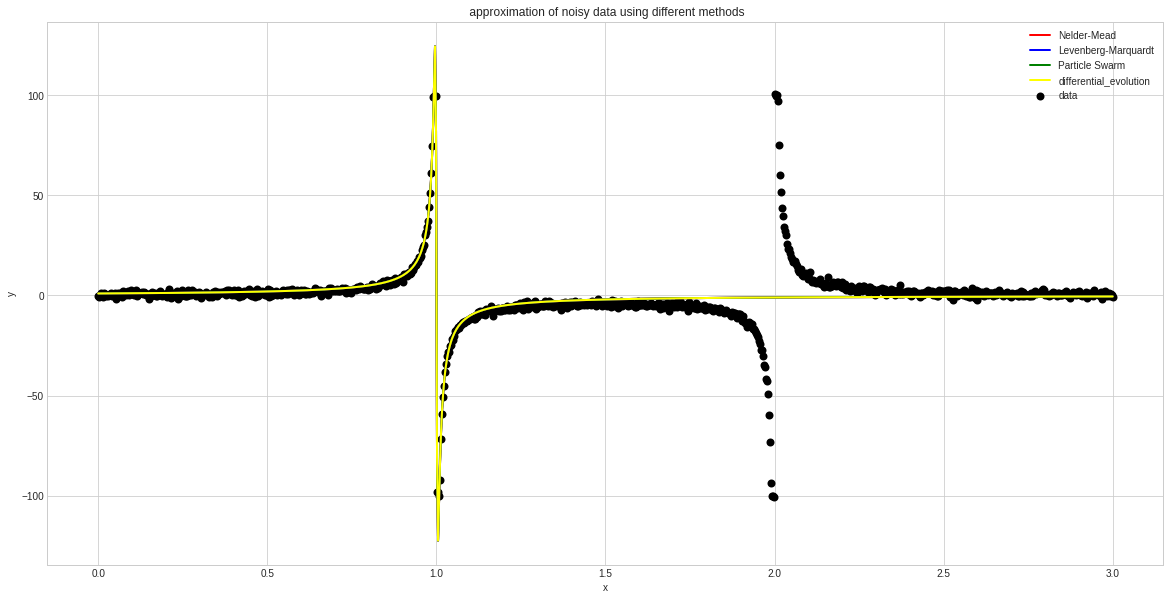

In [23]:
Approx_y = []
for result in results : 
    Approx_y.append([func(result.x,x) for x in X])

fig = plt.figure(figsize=(20,10))
plt.title(" approximation of noisy data using different methods")
plt.xlabel("x")
plt.ylabel("y")
ax = plt.axes()
colors = []

    
ax.scatter(X,Y,color='black', label='data',linewidth=2)
ax.plot(X,Approx_y[0],color='red', label='Nelder-Mead',linewidth=2)
ax.plot(X,Approx_y[1],color='blue', label='Levenberg-Marquardt',linewidth=2)
ax.plot(X,Approx_y[1],color='green', label='Particle Swarm',linewidth=2)
ax.plot(X,Approx_y[1],color='yellow', label='differential_evolution',linewidth=2)
plt.legend();

### Part 3 : farther experiments 

In [25]:
'''
    generate data 
'''
K= np.arange(1001)
X=[(3*k)/1000 for k in K ]
delta =np.random.normal(size=1001)

def f_x (x) : 
    return (1/(x**2-3*x+2))

def Y_k(i): 
    ret = f_x(X[i])
    return ret+delta[i]
 
    
Y=[Y_k(i) for i in range(1001)]    

In [26]:
EPS =0.001
results = [] 
initail_param = [0.4,0.5,0.6,0.2]
res_nelder = optimize.minimize(least_squares, initail_param, args=(X,Y), method="Nelder-Mead",tol=EPS) 
results.append(res_nelder)
print(res_nelder)

 final_simplex: (array([[ 0.39676079, -0.39560463, -1.9941975 ,  0.99420306],
       [ 0.39676087, -0.39560479, -1.99419745,  0.99420301],
       [ 0.39676089, -0.39560479, -1.99419742,  0.99420298],
       [ 0.39676098, -0.395605  , -1.99419736,  0.99420293],
       [ 0.39676076, -0.39560455, -1.99419752,  0.99420308]]), array([2121857.02045379, 2121857.02076851, 2121857.02083528,
       2121857.02104201, 2121857.02130939]))
           fun: 2121857.020453789
       message: 'Optimization terminated successfully.'
          nfev: 602
           nit: 351
        status: 0
       success: True
             x: array([ 0.39676079, -0.39560463, -1.9941975 ,  0.99420306])


In [27]:

err_func = lambda param,XX,YY :[(func(param,x)-y)**2 for x,y in zip(XX,YY)] 
res_lm = ls(err_func,initail_param ,args = (X,Y),method='lm')
results.append(res_lm)
print(res_lm)

 active_mask: array([0, 0, 0, 0])
        cost: 773448848699.1605
         fun: array([2.72905309, 8.35737797, 2.50068394, ..., 0.71787979, 0.51265437,
       0.73809201])
        grad: array([ 2.42088203e+12,  2.37369394e+12, -1.20403298e+16, -2.56284365e+16])
         jac: array([[ 0.        , -3.33619417,  0.        , -5.02727832],
       [-0.01762073, -5.87357796, -0.02663263, -8.87754343],
       [-0.0193945 , -3.23241749, -0.02940229, -4.90038191],
       ...,
       [-1.26983893, -0.4241279 ,  0.95563714,  0.31918408],
       [-1.07094556, -0.35733919,  0.80474777,  0.26851777],
       [ 1.28246087,  0.42748696, -0.96224461, -0.3207482 ]])
     message: '`xtol` termination condition is satisfied.'
        nfev: 414
        njev: None
  optimality: 2.5628436452529908e+16
      status: 3
     success: True
           x: array([ 1.50271441, -1.49233484, -1.99031004,  0.99034079])


In [28]:
bounds = np.array([ [-5,5],[-5,5],[-5,5],[-5,5]] ) 

res_swarm = optimize.dual_annealing(least_squares, bounds=bounds , args=(X,Y),no_local_search=False,maxiter=1000)
print(res_swarm)

     fun: 1770117.0625611653
 message: ['Maximum number of iteration reached']
    nfev: 9046
    nhev: 0
     nit: 1000
    njev: 209
  status: 0
 success: True
       x: array([-0.25837637,  0.25841523, -1.99806607,  0.9980673 ])


In [29]:
bounds = np.array([ [-5,5],[-5,5],[-5,5],[-5,5]] ) 

res_evol = optimize.differential_evolution(least_squares, bounds=bounds , args=(X,Y),maxiter=1000)
results.append(res_evol)
print(res_evol)

     fun: 2553293.866711073
     jac: array([ 1.73822333e+09,  1.74511407e+09, -1.39128735e+12, -1.39713792e+12])
 message: 'Optimization terminated successfully.'
    nfev: 1495
     nit: 4
 success: True
       x: array([ 0.41594416, -0.41377858, -1.99442029,  0.99442722])


<ipython-input-35-c6a5af9b6243>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


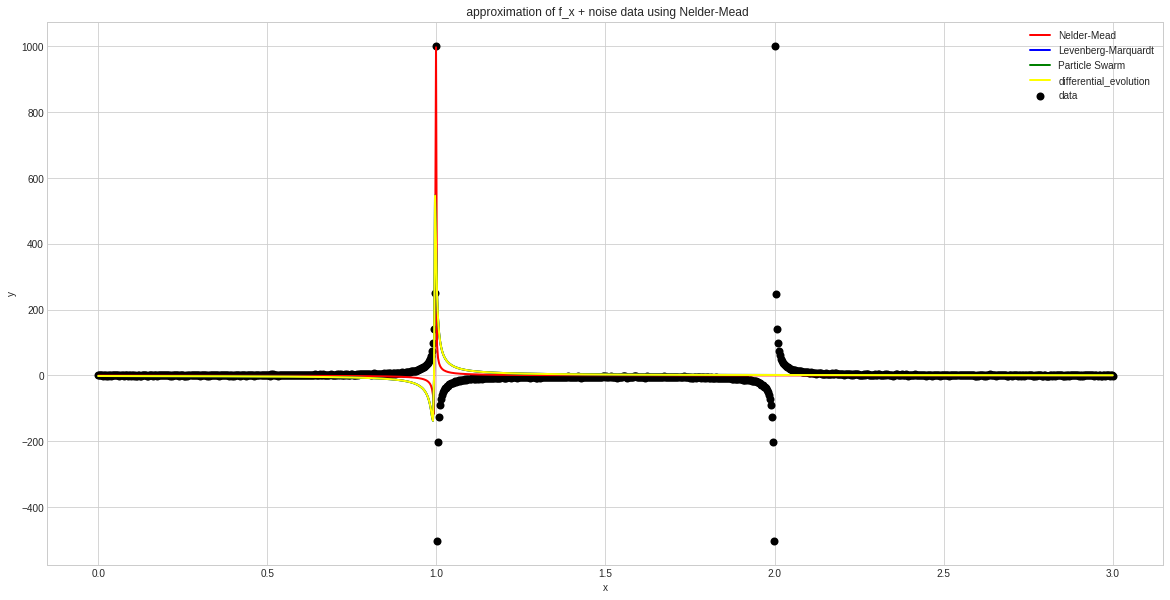

In [35]:
Approx_y = []
for result in results : 
    Approx_y.append([func(result.x,x) for x in X])

fig = plt.figure(figsize=(20,10))
plt.title(" approximation of f_x + noise data using Nelder-Mead")
plt.xlabel("x")
plt.ylabel("y")
ax = plt.axes()
colors = []

    
ax.scatter(X,Y,color='black', label='data',linewidth=2)
ax.plot(X,Approx_y[0],color='red', label='Nelder-Mead',linewidth=2)
ax.plot(X,Approx_y[1],color='blue', label='Levenberg-Marquardt',linewidth=2)
ax.plot(X,Approx_y[1],color='green', label='Particle Swarm',linewidth=2)
ax.plot(X,Approx_y[1],color='yellow', label='differential_evolution',linewidth=2)
plt.legend();